#  ** ANÁLISE DE DADOS DE CRÉDITO EM SQL **

## *Objeto em análise:*

 >   Dados disponibilizados no Github: http://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset
    
## *Objetivos:*

 > A partir dos dados de crédito de determinada instituição financeira, esse projeto busca responder alguns questinamentos:
 
1. Qual o sexo da maior parte dos clientes e sua renda?
2. A escolaridade influencia no tipo de cartão?
3. Qual o sexo que possui maior e menor limite? 
4. Existe diferença salarial entre homens e mulheres?
5. A faixa salarial impacta no limite de crédito?
6. Quanto à quantidade de produtos adquiridos pelos clientes, existe alguma relação com o sexo ou com o número de interações com a instituição?

## *Método utilizado:*

   A tabela foi criada no **AWS Athena** junto com o **S3 Bucket**.
    
## *Dados:*

  Os dados representam informações de clientes de um banco e possuem as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

## **Exploração de dados:**

Inicialmente será feita a exploração de dados para obter todas as informações necessárias para a análise. Tal será realizada mediante simples questionamentos e as querys utilizadas no AWS:

**Qual a quantidade de informações nesta base de dados?**

Query: SELECT count(*) FROM credito

> Resposta: 2564 linhas

**Como são os dados? (Uma visão superficial das 10 primeiras linhas do dataset)**

Query: SELECT * FROM credito LIMIT 10;

![Query: SELECT * FROM credito LIMIT 10;](https://github.com/marianeneiva/sqlEBAC/blob/main/limit10.png?raw=true)

*Obs: Valores nulos serão tratados posteriormente.*

**Quais os tipos de cada dado?**

Query: DESCRIBE credito

![](https://github.com/marianeneiva/sqlEBAC/blob/main/describe.png?raw=true)

**Quais são os tipos de escolaridade?**

Query: SELECT DISTINCT escolaridade FROM credito

![](https://github.com/marianeneiva/sqlEBAC/blob/main/escolaridade.png?raw=true)

**Quais são os tipos de estado civil?**

Query: SELECT DISTINCT estado_civil FROM credito

![](https://github.com/marianeneiva/sqlEBAC/blob/main/estado_civil.png?raw=true)

**O salário anual está representado em faixas salariais, quais são essas faixas?**

Query: SELECT DISTINCT salario_anual FROM credito

![](https://github.com/marianeneiva/sqlEBAC/blob/main/salario_anual.png?raw=true)

**Quais são os tipos de cartão oferecidos pela instituição?**

Query: SELECT DISTINCT tipo_cartao FROM credito

![](https://github.com/marianeneiva/sqlEBAC/blob/main/cartao.png?raw=true)

## **Análise de dados**

Com a exploração dos principais dados do dataset com foco nos objetivos feita, partiremos para as análises.


**Qual a quantidade de clientes para cada faixa salarial?**

Query: select count(*), salario_anual from credito group by salario_anual

![](https://github.com/marianeneiva/sqlEBAC/blob/main/faixa_salarial.png?raw=true)

A maior parte dos clientes possue uma renda menor que 40K, enquanto a menor parte uma renda superior a 120K.

**Quantos clientes são homens e quantos são mulheres?**

Query: select count(*), sexo from credito group by sexo

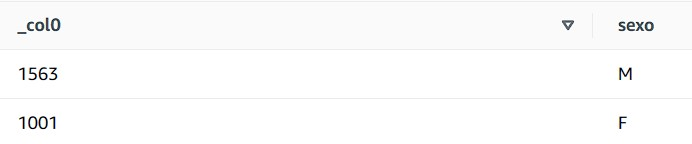

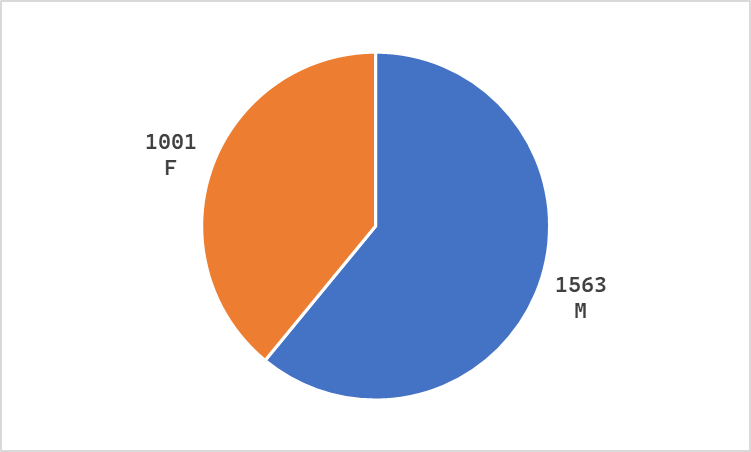

A insituição em questão apresenta um número maior de clientes, mas não é possível a partir apenas desse dado considerar uma diferença significativa.

**Qual a menor e maior idade de cada sexo?**

Query: select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

![](https://github.com/marianeneiva/sqlEBAC/blob/main/idade_sexopng.png?raw=true)

A faixa etária dos clientes abrange mais de 40 anos de diferença entre o mais novo e mais velho, para o marketing, por exemplo, seria preciso uma variedade maior de atrativos para atingir todas as idades.

**Qual a maior e menor transação dos clientes?**

Query: select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito

![](https://github.com/marianeneiva/sqlEBAC/blob/main/transacoes.png?raw=true)

Aparentemente não existe um padrão do número de transações. 

**Quais as características dos clientes que possuem os maiores créditos?**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

![](https://github.com/marianeneiva/sqlEBAC/blob/main/limite_desc.png?raw=true)

**Quais as características dos clientes que possuem os menores créditos?**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc


![](https://github.com/marianeneiva/sqlEBAC/blob/main/limite_asc.png?raw=true)

Quanto ao limite de crédito, não existe uma relação direta entre escolaridade, o tipo de cartão e o sexo do cliente.

**Qual a faixa salarial dos homens e mulheres?**

Query: Select sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual 

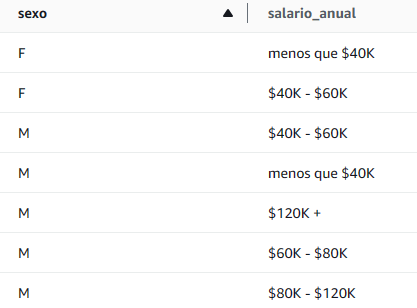

Pode-se observar que o salário anual das mulheres não ultrapassa 60K. O que valeria uma estudo mais profundo se consiste em um problema cultural ou não.

**O salário impacta no limite de crédito?**

Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

![](https://github.com/marianeneiva/sqlEBAC/blob/main/salarioAnualMediaLimite.png?raw=true)

Diferentemente da observação anterior, o salário impacta no limite de crédito. Quanto menor o salário anual, menor o limite e vice versa.

**Tem alguma relação entre o número de interações com os bancos com os produtos adquiridos? Depende do quanto o banco tem proximidade com o cliente?**

Query: Select count(*) qtd_produtos, iteracoes_12m from credito group by iteracoes_12m order by qtd_produtos desc

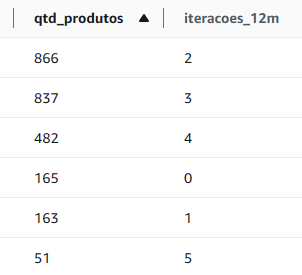

**Qual o sexo mais propenso a adquirir produtos?**

Query: Select count(*) qtd_produtos, sexo from credito group by sexo order by qtd_produtos asc

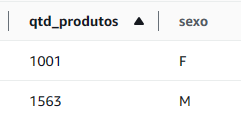

Quanto à quantidade de produtos, não podemos concluir que existe alguma relação com as interações com o banco, ou seja, não necessariamente seja as ligações ou envio de sms/email com ofertas que incentivem o cliente a adquirir um novo produto.Mas pode-se concluir que os homens possuem mais propensão à adquirí-los.

# Conclusão

A partir destas análises chegamos à alguns insights: 

*  a maior parte dos clientes possui renda até 40K e são do sexo masculino
*  a escolaridade não parece influenciar no limite, no tipo do cartão, nem na quantidade de dependentes
*  os clientes com maiores limites são em sua maioria homens e com menores, mulheres
*  o salário anual das mulheres é inferior ao dos homens
*  a faixa salarial impacta diretamente no limite de crédito
*  a interação direta cliente-banco não influencia na obtenção de um novo produto
*  majoritariamente, homens adquirem mais novos produtos (bancários)